In [36]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
filepth=r"D:\L2A_T43SER_A022453_20191010T054917\IMG_DATA\R10m"

In [29]:
band4=rasterio.open("D:\L2A_T43SER_A022453_20191010T054917\IMG_DATA\R10m\T43SER_20191010T053731_B04_10m.jp2",driver='JP2OpenJPEG') #red
band8=rasterio.open("D:\L2A_T43SER_A022453_20191010T054917\IMG_DATA\R10m\T43SER_20191010T053731_B08_10m.jp2",driver='JP2OpenJPEG') #nir

In [5]:
band4.height

10980

In [6]:
band4.width

10980

In [7]:
band4.crs

CRS.from_epsg(32643)

In [8]:
band4.transform

Affine(10.0, 0.0, 499980.0,
       0.0, -10.0, 3600000.0)

In [9]:
band4.dtypes[0]

'uint16'

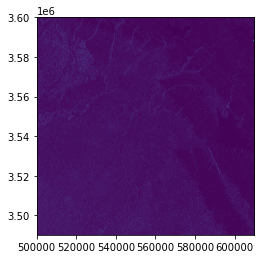

<AxesSubplot:>

In [10]:
plot.show(band4)

In [11]:
band4.read(1)

array([[1110,  832,  627, ...,  340,  426,  442],
       [1088,  960,  713, ...,  450,  499,  526],
       [ 943,  919,  763, ...,  645,  720,  691],
       ...,
       [ 540,  526,  551, ..., 1302,  866,  557],
       [ 557,  546,  567, ..., 1230,  952,  558],
       [ 551,  566,  563, ..., 1096, 1068,  787]], dtype=uint16)

In [13]:
red=band4.read(1).astype('float64') #generation of red band as array
nir=band8.read(1).astype('float64') #generation of nir band as array

nir

array([[2400., 2654., 2929., ..., 3067., 3377., 2335.],
       [2393., 2530., 2647., ..., 2834., 3175., 2852.],
       [2563., 2556., 2526., ..., 2884., 3106., 3179.],
       ...,
       [3474., 3133., 2946., ..., 3123., 2818., 2967.],
       [3134., 3094., 3038., ..., 2661., 2447., 2435.],
       [3066., 3037., 3018., ..., 2442., 1845., 1740.]])

In [16]:
#ndvi calculation, empty cells or nodata cells are reported as 0
ndvi=np.where(
     (nir+red)==0.,
     0,
     (nir-red)/(nir+red))

ndvi[:5,:5]


<ipython-input-16-df697b0bdece>:5: RuntimeWarning: invalid value encountered in true_divide
  (nir-red)/(nir+red))


array([[0.36752137, 0.52266208, 0.64735658, 0.65543964, 0.66299942],
       [0.37489227, 0.44985673, 0.57559524, 0.65440937, 0.66943734],
       [0.46206503, 0.47107914, 0.53602919, 0.66624285, 0.70139969],
       [0.53499268, 0.57850071, 0.62805873, 0.72568579, 0.71330863],
       [0.49286754, 0.58559062, 0.69880716, 0.72545326, 0.7078534 ]])

In [35]:
#export ndvi image
ndviImage=rasterio.open('D:\L2A_T43SER_A022453_20191010T054917\Output\ndviImage.tiff','w',driver='Gtiff',
                       width=band4.width,
                       height=band4.height,
                       count=1, crs=band4.crs,
                       transform=band4.transform,
                       dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()

RasterioIOError: Attempt to create new tiff file 'D:/L2A_T43SER_A022453_20191010T054917/Output dviImage.tiff' failed: No error

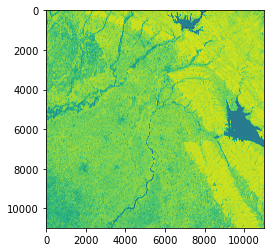

In [28]:
#plot of the ndvi image
plt.imshow(ndvi)